In [1]:
# Step 1 Data Processing

from keras.preprocessing import sequence
from keras.datasets import imdb

max_words= 20000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

Using TensorFlow backend.


17465344/17464789 [==============================] - 1s 0us/step


In [0]:
max_len = 80
X_train = sequence.pad_sequences(X_train,maxlen=max_len,padding='pre', truncating='pre')
X_test = sequence.pad_sequences(X_test,maxlen=max_len)

In [0]:
# Step 2 Define Model

from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU

In [0]:
model = Sequential()
model.add(Embedding(max_words,128))
model.add(LSTM(32))
model.add(Dense(1,activation='sigmoid'))

In [6]:
# Step 3: Compile Model

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
history = model.fit(X_train,y_train, 
                    epochs=5,
                    validation_data=(X_test,y_test))




Train on 25000 samples, validate on 25000 samples
Epoch 1/10





25000/25000 [==============================] - 109s 4ms/step - loss: 0.4212 - acc: 0.7996 - val_loss: 0.3841 - val_acc: 0.8300
Epoch 2/10
25000/25000 [==============================] - 98s 4ms/step - loss: 0.2344 - acc: 0.9055 - val_loss: 0.3918 - val_acc: 0.8402
Epoch 3/10
25000/25000 [==============================] - 100s 4ms/step - loss: 0.1410 - acc: 0.9470 - val_loss: 0.5000 - val_acc: 0.8274
Epoch 4/10
25000/25000 [==============================] - 98s 4ms/step - loss: 0.0921 - acc: 0.9669 - val_loss: 0.4987 - val_acc: 0.8080
Epoch 5/10
25000/25000 [==============================] - 98s 4ms/step - loss: 0.0649 - acc: 0.9780 - val_loss: 0.7321 - val_acc: 0.8178
Epoch 6/10
25000/25000 [==============================] - 98s 4ms/step - loss: 0.0434 - acc: 0.9855 - val_loss: 0.6937 - val_acc: 0.8182
Epoch 7/10
25000/25000 [==============================] - 98s 4ms/step - loss: 0.0335 - acc: 0.9892 - val_loss: 0.7950

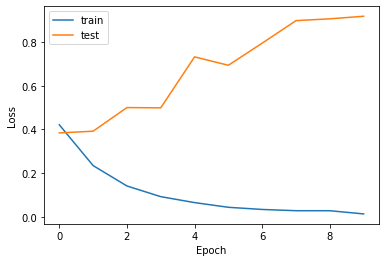

In [8]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch, loss, label='train')
plt.plot(epoch, val_loss, label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

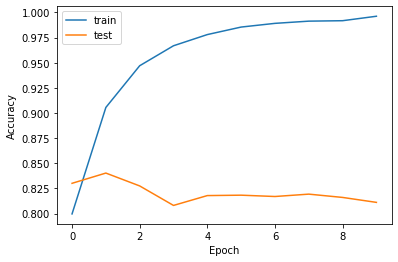

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
epoch = range(len(acc))

plt.plot(epoch,acc,label='train')
plt.plot(epoch,val_acc,label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Ex: RNN on MNIST dataset

In [13]:
import keras
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255, x_test / 255

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(32, activation='relu', input_shape=(28,28)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [17]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.7713 - acc: 0.7426 - val_loss: 0.2556 - val_acc: 0.9181
Epoch 2/5
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.2187 - acc: 0.9331 - val_loss: 0.1607 - val_acc: 0.9504
Epoch 3/5
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.1583 - acc: 0.9519 - val_loss: 0.1205 - val_acc: 0.9615
Epoch 4/5
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.1297 - acc: 0.9607 - val_loss: 0.1103 - val_acc: 0.9631
Epoch 5/5
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.1114 - acc: 0.9658 - val_loss: 0.1094 - val_acc: 0.9645


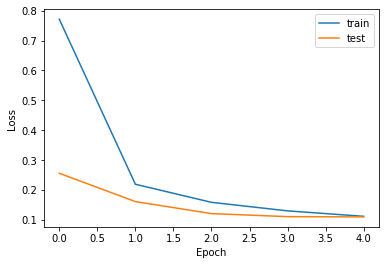

In [20]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch, loss, label='train')
plt.plot(epoch, val_loss, label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

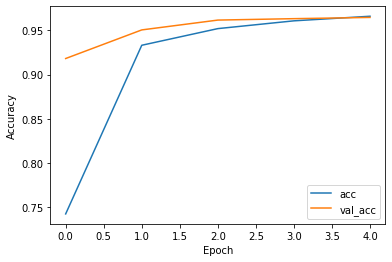

In [22]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
epoch = range(len(acc))

plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Stack RNN Architecture

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(32, activation='relu',input_shape=(28,28),return_sequences=True))
model.add(LSTM(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [24]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 155s 3ms/sample - loss: 0.6260 - acc: 0.7882 - val_loss: 0.2197 - val_acc: 0.9366
Epoch 2/5
60000/60000 [==============================] - 153s 3ms/sample - loss: 0.1889 - acc: 0.9413 - val_loss: 0.1350 - val_acc: 0.9597
Epoch 3/5
60000/60000 [==============================] - 152s 3ms/sample - loss: 0.1342 - acc: 0.9586 - val_loss: 0.1001 - val_acc: 0.9691
Epoch 4/5
60000/60000 [==============================] - 158s 3ms/sample - loss: 0.1071 - acc: 0.9670 - val_loss: 0.0990 - val_acc: 0.9697
Epoch 5/5
60000/60000 [==============================] - 160s 3ms/sample - loss: 0.0898 - acc: 0.9724 - val_loss: 0.0859 - val_acc: 0.9738


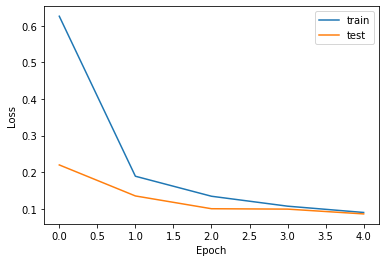

In [25]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch, loss, label='train')
plt.plot(epoch, val_loss, label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

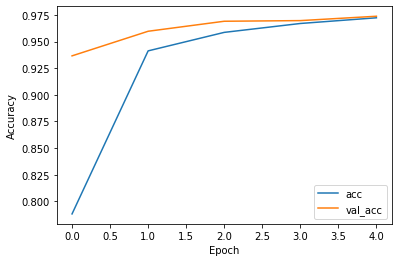

In [26]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
epoch = range(len(acc))

plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Bidirectional RNN Architecuture

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense

model = Sequential()
model.add(Bidirectional(LSTM(32, input_shape=(28,28))))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [29]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 171s 3ms/sample - loss: 0.4658 - acc: 0.8493 - val_loss: 0.2120 - val_acc: 0.9353
Epoch 2/5
60000/60000 [==============================] - 167s 3ms/sample - loss: 0.1478 - acc: 0.9544 - val_loss: 0.1183 - val_acc: 0.9626
Epoch 3/5
60000/60000 [==============================] - 163s 3ms/sample - loss: 0.1076 - acc: 0.9669 - val_loss: 0.0911 - val_acc: 0.9722
Epoch 4/5
60000/60000 [==============================] - 164s 3ms/sample - loss: 0.0874 - acc: 0.9723 - val_loss: 0.0904 - val_acc: 0.9712
Epoch 5/5
60000/60000 [==============================] - 166s 3ms/sample - loss: 0.0741 - acc: 0.9767 - val_loss: 0.0756 - val_acc: 0.9748


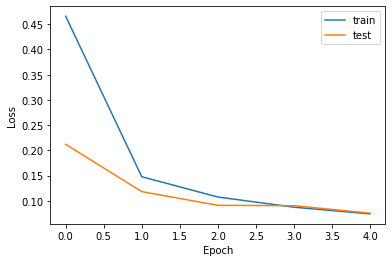

In [30]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch, loss, label='train')
plt.plot(epoch, val_loss, label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

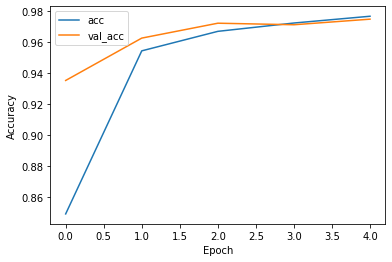

In [31]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
epoch = range(len(acc))

plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()